In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.scorer import make_scorer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
# Loading data
train = pd.read_csv('train_fwYjLYX.csv', parse_dates=['application_date'])
test = pd.read_csv('test_1eLl9Yf.csv', parse_dates=['application_date'])

In [3]:
print(f'Shape of training data is {train.shape}')

Shape of training data is (80402, 6)


In [4]:
print(f'Shape of testing data is {test.shape}')

Shape of testing data is (180, 3)


In [0]:
Sub = test[['id','application_date','segment']]
test.drop('id',axis=1,inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null datetime64[ns]
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.7+ MB


In [7]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null datetime64[ns]
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 11.9 MB


In [8]:
train['application_date'].max(), train['application_date'].min()
# Training data starts from 1st of April 2017 and ends at 23rd of July 2019. Roughly 2 years of data.

(Timestamp('2019-07-23 00:00:00'), Timestamp('2017-04-01 00:00:00'))

Text(0, 0.5, 'Count')

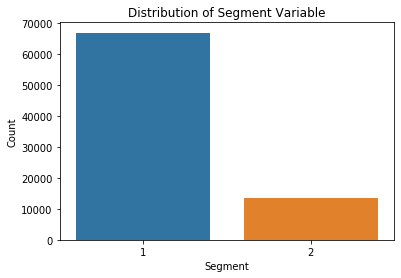

In [9]:
sns.countplot(train['segment'],order=train['segment'].value_counts().index)
plt.title("Distribution of Segment Variable")
plt.xlabel("Segment")
plt.ylabel("Count")
# Lot more values of Segment1 than Segment2

In [10]:
train['branch_id'].value_counts(dropna=False).head(10)
# All of the branch_id's have the same count i.e. 806 and this variable has 13504 missing values.

NaN      13504
159.0      806
17.0       806
67.0       806
269.0      806
74.0       806
268.0      806
135.0      806
62.0       806
271.0      806
Name: branch_id, dtype: int64

In [11]:
print ("Number of Unique Branch_Id's in Training Data:{}".format(train['branch_id'].nunique()))
# 83 unique branch_id's in total in training dataset.

Number of Unique Branch_Id's in Training Data:83


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

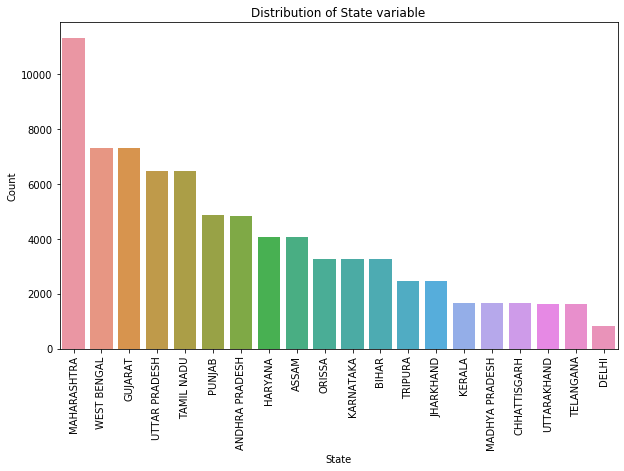

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(train['state'],order=train['state'].value_counts(dropna=False).index)
plt.title("Distribution of State variable")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=90)
# Maharashtra has the largest count followed by West Bengal and Gujarat, Delhi has the least count.

Total no. of states in the data are 20


['WEST BENGAL',
 'DELHI',
 'KARNATAKA',
 'TAMIL NADU',
 'UTTAR PRADESH',
 'PUNJAB',
 'TELANGANA',
 'ANDHRA PRADESH',
 'MAHARASHTRA',
 'ORISSA',
 'GUJARAT',
 'ASSAM',
 'JHARKHAND',
 'UTTARAKHAND',
 'KERALA',
 'CHHATTISGARH',
 'BIHAR',
 'TRIPURA',
 'MADHYA PRADESH',
 'HARYANA']

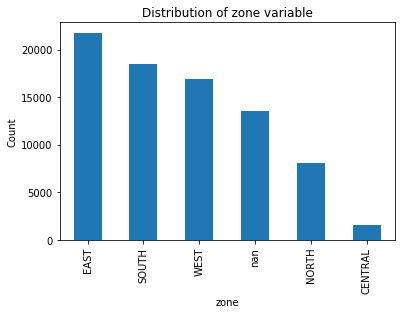

In [13]:
train['zone'].value_counts(dropna=False).plot(kind='bar')
plt.title("Distribution of zone variable")
plt.xlabel("zone")
plt.ylabel("Count")
# East has the highest count and Central has the least count, lot of missing values here.# List of states
print(f'Total no. of states in the data are {train.state.unique().size}')
list(train.state.unique())

In [14]:
train['case_count'].describe()

count    80402.000000
mean       185.481841
std        749.602925
min          0.000000
25%          0.000000
50%         18.000000
75%         60.000000
max      13787.000000
Name: case_count, dtype: float64

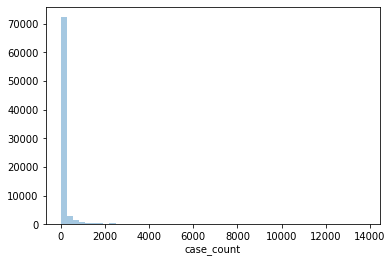

In [15]:
sns.distplot(train['case_count'],kde=False,bins=50)
# As we can see a lot of 0 values.

In [16]:
train.head()

application_date  segment  branch_id        state  zone  case_count
0       2017-04-01        1        1.0  WEST BENGAL  EAST        40.0
1       2017-04-03        1        1.0  WEST BENGAL  EAST         5.0
2       2017-04-04        1        1.0  WEST BENGAL  EAST         4.0
3       2017-04-05        1        1.0  WEST BENGAL  EAST       113.0
4       2017-04-07        1        1.0  WEST BENGAL  EAST        76.0

In [17]:
train.groupby('segment')['case_count'].agg(['min','max','mean','median','std'])
# We can see that the Maximum value of case_count belongs to segment 2. 
# all these values for segment1 are higher than segment2.train_df.head()

min      max        mean  median          std
segment                                               
1        0.0   1890.0   32.707106    14.0    61.591868
2        0.0  13787.0  942.318646   371.0  1624.339623

In [18]:
train.groupby('state')['case_count'].agg(['count','min','max','mean','median','std','sum']).sort_values(by='count')
# Although the count of Maharashtra is maximum, the sum of all case counts is maximum for Tamil Nadu.

count  min      max        mean  median          std        sum
state                                                                          
DELHI             806  0.0   1488.0  168.486352   136.0   148.757794   135800.0
UTTARAKHAND      1612  0.0    383.0   24.782258    20.0    27.525605    39949.0
TELANGANA        1612  0.0   1038.0   56.153226     0.0    88.913544    90519.0
KERALA           1650  0.0   3369.0  496.008485    39.5   722.016808   818414.0
CHHATTISGARH     1650  0.0   1111.0  181.298788    22.5   241.012685   299143.0
MADHYA PRADESH   1650  0.0   2350.0  348.672121    87.0   455.859267   575309.0
TRIPURA          2456  0.0    997.0   82.313111    32.0   142.665541   202161.0
JHARKHAND        2456  0.0    833.0   69.036645    20.0   137.794878   169554.0
BIHAR            3262  0.0   7691.0  419.025445    25.0  1111.541528  1366861.0
KARNATAKA        3262  0.0   5202.0  519.345494    35.0   972.285346  1694105.0
ORISSA           3262  0.0   5831.0  408.938688    45.0   950.226384  1333958.0
ASSAM            4068  0.0   3208.0  187.618240    28.0   454.378089   763231.0
HARYANA          4068  0.0    118.0    2.961652     0.0     7.547701    12048.0
ANDHRA PRADESH   4836  0.0    179.0    3.517370     0.0     8.804760    17010.0
PUNJAB           4874  0.0    448.0   14.948502     8.0    25.272373    72859.0
TAMIL NADU       6486  0.0  13787.0  634.457601    11.0  2032.364822  4115092.0
UTTAR PRADESH    6486  0.0   1203.0   43.638760     0.0   131.554427   283041.0
GUJARAT          7292  0.0   1890.0   84.943774    25.0   151.453904   619410.0
WEST BENGAL      7292  0.0   4962.0  212.441306    40.0   580.958702  1549122.0
MAHARASHTRA     11322  0.0   1754.0   66.730701    27.0   124.410140   755525.0

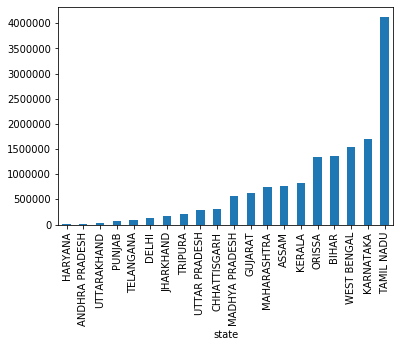

In [19]:
train.groupby('state')['case_count'].sum().sort_values().plot(kind='bar')

In [20]:
train.groupby('zone')['case_count'].agg(['count','min','max','mean','median','std','sum']).sort_values(by='count')
# Even here, although the count of East zone is maximum, but the total case_counts received in West zone is highest.

count  min     max       mean  median        std       sum
zone                                                               
CENTRAL   1612  0.0   609.0  23.082506    11.0  36.657118   37209.0
NORTH     8060  0.0  1488.0  27.383002     6.0  69.671582  220707.0
WEST     16926  0.0  1890.0  46.985053    23.0  77.373460  795269.0
SOUTH    18538  0.0  1143.0  26.973784     8.0  54.089844  500040.0
EAST     21762  0.0  1657.0  29.170802    16.0  48.989433  634815.0

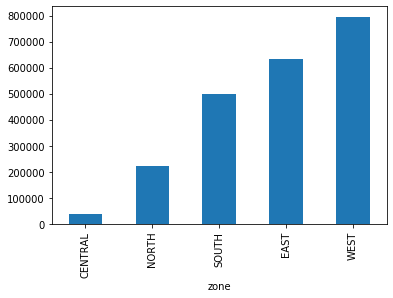

In [21]:
train.groupby('zone')['case_count'].sum().sort_values().plot(kind='bar')

In [0]:
# Let's create some additional datetime based features
train['year'] = train.application_date.dt.year
train['month'] = train.application_date.dt.month
train['dayofweek'] = train.application_date.dt.dayofweek
train['day'] = train.application_date.dt.day
train['quarter'] = train.application_date.dt.quarter
train['is_month_start'] = train.application_date.dt.is_month_start
train['is_month_end'] = train.application_date.dt.is_month_end
train['is_quarter_start'] = train.application_date.dt.is_quarter_start
train['is_quarter_end'] = train.application_date.dt.is_quarter_end

In [23]:
train.head()

application_date  segment  ...  is_quarter_start is_quarter_end
0       2017-04-01        1  ...              True          False
1       2017-04-03        1  ...             False          False
2       2017-04-04        1  ...             False          False
3       2017-04-05        1  ...             False          False
4       2017-04-07        1  ...             False          False

[5 rows x 15 columns]

In [0]:
test['year'] = test.application_date.dt.year
test['month'] = test.application_date.dt.month
test['dayofweek'] = test.application_date.dt.dayofweek
test['day'] = test.application_date.dt.day
test['quarter'] = test.application_date.dt.quarter
test['is_month_start'] = test.application_date.dt.is_month_start
test['is_month_end'] = test.application_date.dt.is_month_end
test['is_quarter_start'] = test.application_date.dt.is_quarter_start
test['is_quarter_end'] = test.application_date.dt.is_quarter_end

In [25]:
test.head()

application_date  segment  ...  is_quarter_start  is_quarter_end
0       2019-07-06        1  ...             False           False
1       2019-07-07        1  ...             False           False
2       2019-07-08        1  ...             False           False
3       2019-07-09        1  ...             False           False
4       2019-07-10        1  ...             False           False

[5 rows x 11 columns]

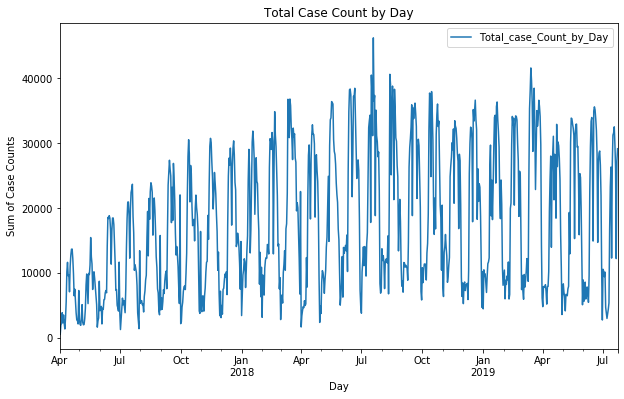

In [26]:
train.set_index('application_date').resample('D')['case_count'].sum().plot(kind='line',figsize=(10,6),label='Total_case_Count_by_Day')
plt.title("Total Case Count by Day")
plt.xlabel('Day')
plt.ylabel("Sum of Case Counts")
plt.legend(loc='best')
# We can see some kind of trend here, the sum total of case counts increases for sometime and then stays almost same. 
# We can also see a spike that is apart from the trend around July-Oct of 2018.

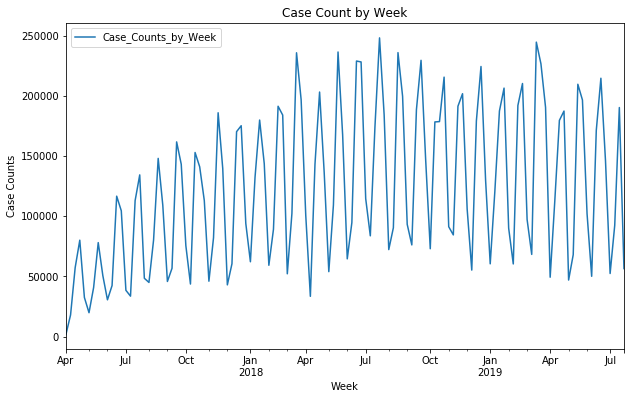

In [27]:
train.set_index('application_date').resample('W')['case_count'].sum().plot(kind='line',figsize=(10,6),label='Case_Counts_by_Week')
plt.title("Case Count by Week")
plt.xlabel('Week')
plt.ylabel("Case Counts")
plt.legend(loc='best')
# We can see increasing and decreasing trends here

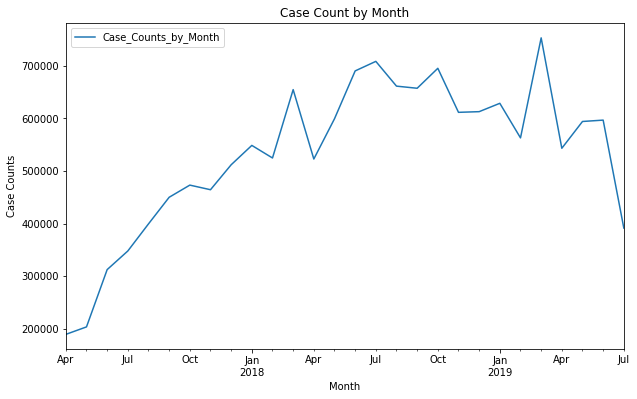

In [28]:
train.set_index('application_date').resample('M')['case_count'].sum().plot(kind='line',figsize=(10,6),label='Case_Counts_by_Month')
plt.title("Case Count by Month")
plt.xlabel('Month')
plt.ylabel("Case Counts")
plt.legend(loc='best')
# We can see a gradual increase for sometime and then series of increasing and decreasing trends followed by a dip at the endtest_df.head()

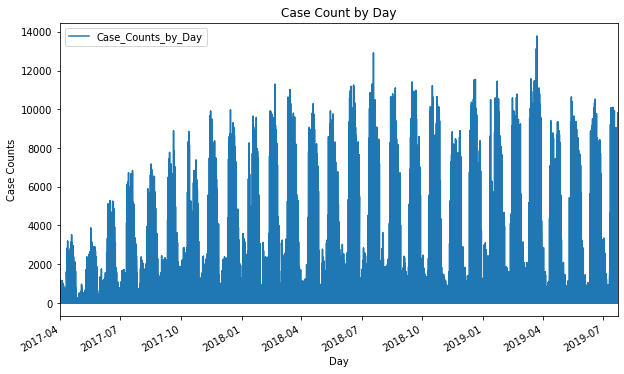

In [29]:
train.set_index('application_date')['case_count'].plot(kind='line',figsize=(10,6),label='Case_Counts_by_Day')
plt.title("Case Count by Day")
plt.xlabel('Day')
plt.ylabel("Case Counts")
plt.legend(loc='best')
# We can see increasing and decreasing trends here

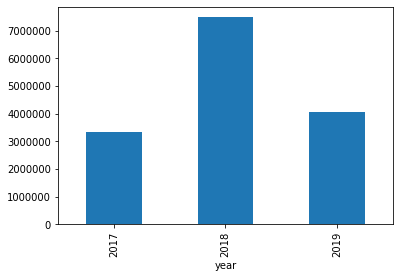

In [30]:
train.groupby('year')['case_count'].sum().sort_index().plot(kind='bar')
# we can see a spike in the total case counts from 2017 to 2018

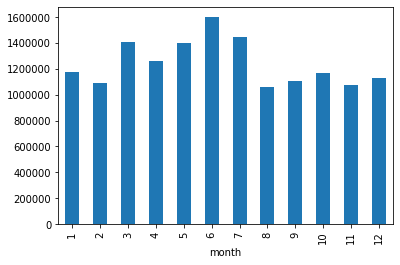

In [31]:
train.groupby('month')['case_count'].sum().sort_index().plot(kind='bar')
# case_count sum is maximum during the month of June followed by July,March and May which are close to each other. It is minimum
# in the month of August.

In [32]:
train.groupby('dayofweek')['case_count'].agg(['count','min','max','sum','mean']).sort_values(by='count')
# Thursday has the highest occurence and Sunday has the least. 
# Wednesday has the highest sum total of case counts.

count  min      max        sum        mean
dayofweek                                            
6          11149  0.0  10250.0  1436647.0  128.858821
5          11398  0.0  13787.0  2135403.0  187.348921
2          11548  0.0  11160.0  2314316.0  200.408382
4          11548  0.0  13118.0  2262137.0  195.889938
0          11564  0.0  10805.0  2173422.0  187.947250
1          11564  0.0  11506.0  2280995.0  197.249654
3          11631  0.0  12908.0  2310191.0  198.623592

In [33]:
train.groupby(['year','quarter'])['case_count'].agg(['count','min','max','sum','mean'])
# Count is maximum during the 4th Quarter of 2017 and 3rd and 4th quarter of 2018.
# Sum is maximum during 3rd quarter of 2017.

count  min      max        sum        mean
year quarter                                            
2017 2         8428  0.0   5274.0   706232.0   83.795918
     3         8361  0.0   8884.0  1197941.0  143.277240
     4         9108  0.0   9963.0  1449814.0  159.180281
2018 1         8578  0.0  11288.0  1728408.0  201.493122
     2         9009  0.0  11241.0  1812629.0  201.202020
     3         9108  0.0  12908.0  2027253.0  222.579381
     4         9108  0.0  11536.0  1919816.0  210.783487
2019 1         8910  0.0  13787.0  1944961.0  218.289675
     2         9009  0.0  10629.0  1734401.0  192.518704
     3          783  0.0  10099.0   391656.0  500.199234

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_pred - y_true) / y_pred)) * 100

my_scorer = make_scorer(mean_absolute_percentage_error,greater_is_better=True)

def final_mape (mape1,mape2):
    return 0.5*mape1+0.5*mape2

In [35]:
df_train = train.groupby(['application_date','segment'],as_index=False)['case_count'].sum()
df_train.shape

(1650, 3)

In [0]:
holidays = ['2017-04-05','2017-04-09','2017-04-14','2017-05-01',
       '2017-05-10', '2017-06-25', '2017-06-26', '2017-08-07',
       '2017-08-14', '2017-08-15', '2017-08-25', '2017-09-02',
       '2017-09-04', '2017-09-30', '2017-10-01', '2017-10-02',
       '2017-10-19', '2017-12-01', '2017-12-25', '2018-01-01', 
       '2018-01-14', '2018-01-22', '2018-01-26',
       '2018-01-31', '2018-02-10', '2018-02-14', '2018-02-19',
       '2018-03-01', '2018-03-02', '2018-03-18', '2018-03-25',
       '2018-03-29', '2018-03-30', '2018-04-01', '2018-04-14',
       '2018-04-15', '2018-04-30', '2018-05-09', '2018-06-15',
       '2018-06-16', '2018-07-14', '2018-08-15', '2018-08-17',
       '2018-08-22', '2018-08-25', '2018-08-26', '2018-09-03',
       '2018-09-13', '2018-09-21', '2018-10-02', '2018-10-16',
       '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-24',
       '2018-10-27', '2018-11-06', '2018-11-07', '2018-11-08',
       '2018-11-09', '2018-11-13', '2018-11-21', '2018-11-23',
       '2018-11-24', '2018-12-24', '2018-12-25', '2019-01-01',
       '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-26',
       '2019-02-10', '2019-02-19', '2019-03-01', '2019-03-04',
       '2019-03-20', '2019-03-21', '2019-04-06', '2019-04-13',
       '2019-04-14', '2019-04-15', '2019-04-17', '2019-04-19',
       '2019-04-21', '2019-05-09', '2019-05-18', '2019-05-31',
       '2019-06-05', '2019-07-04', '2019-08-12', '2019-08-15',
       '2019-08-17', '2019-08-24', '2019-09-02', '2019-09-10',
       '2019-09-11', '2019-10-02', '2019-10-05', '2019-10-06',
       '2019-10-07', '2019-10-08', '2019-10-13', '2019-10-17',
       '2019-10-27', '2019-10-28', '2019-10-29', '2019-11-02',
       '2019-11-10', '2019-11-12', '2019-11-24', '2019-12-24',
       '2019-12-25']

In [0]:
# defining a function to create a weekend indicator
def weekend_indicator(x):
    if (x>4 and x<=6):
        return True
    else:
        return False

In [0]:
df_train['year'] = df_train.application_date.dt.year
df_train['month'] = df_train.application_date.dt.month
df_train['dayofweek'] = df_train.application_date.dt.dayofweek
df_train['day'] = df_train.application_date.dt.day
df_train['quarter'] = df_train.application_date.dt.quarter
df_train['is_month_start'] = df_train.application_date.dt.is_month_start
df_train['is_month_end'] = df_train.application_date.dt.is_month_end
df_train['is_quarter_start'] = df_train.application_date.dt.is_quarter_start
df_train['is_quarter_end'] = df_train.application_date.dt.is_quarter_end
df_train['weekend'] = df_train.dayofweek.apply(weekend_indicator)

test['weekend'] = test.dayofweek.apply(weekend_indicator)

In [0]:
X = df_train[[col for col in df_train.columns if col not in ['application_date','case_count']]]
y = df_train['case_count']

In [0]:

cols = ['year','month','dayofweek','day','quarter']
for col in cols:
    df_train[col] = df_train[col].astype('category')
    test[col] = test[col].astype('category')

In [41]:
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.15,random_state=42)
print (X_Train.shape)
print (y_Train.shape)
print (X_Test.shape)
print (y_Test.shape)

(1402, 11)
(1402,)
(248, 11)
(248,)


In [0]:
test.drop('application_date',axis=1,inplace=True)

In [43]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
parameters = {"n_estimators":[500,1000,1500,2000],
              "max_depth":[5,7,9,11],
              "min_samples_leaf":[2,3,5,7],
              "min_samples_split":[2,5,7,9]}
search = RandomizedSearchCV(estimator=rf,param_distributions=parameters,cv=5,scoring=my_scorer,n_jobs=-1)
search.fit(X_Train,y_Train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [44]:
y_pred = search.best_estimator_.predict(X_Test)
print (mean_absolute_percentage_error(y_Test,y_pred))

30.380304203949255


In [45]:
search.best_estimator_,search.best_params_,search.best_score_

(RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=7,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=2000, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 {'max_depth': 5,
  'min_samples_leaf': 7,
  'min_samples_split': 5,
  'n_estimators': 2000},
 27.53345923195537)

In [0]:
Sub['case_count'] = search.best_estimator_.predict(test)

In [0]:
Sub['case_count'] = Sub['case_count'].astype(int)

In [0]:
Sub.to_csv("Sub_2.csv",index=None)

In [49]:
Sub

id application_date  segment  case_count
0      1       2019-07-06        1        2214
1      2       2019-07-07        1        1715
2      3       2019-07-08        1        3180
3      4       2019-07-09        1        3181
4      5       2019-07-10        1        3181
..   ...              ...      ...         ...
175  176       2019-10-20        2       16815
176  177       2019-10-21        2       26678
177  178       2019-10-22        2       26678
178  179       2019-10-23        2       26678
179  180       2019-10-24        2       26670

[180 rows x 4 columns]